# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 36 <br>
Group Name: Seaborn

Group Members:
- Jeremy Deandito (18222112)
- Nathaniel Liady (18222114)
- Gabriel Marcellino (18222115)
- Nicolas Jeremy (18222135)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np


# Import other libraries if needed
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import zscore
pd.set_option('display.max_columns',None)


# Modules to preprocessing and cleaning
from Modules.FeaturesMissingHandler import *

# Import Dataset

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN,0.417,0.0,0.000,0.0,0.0,0.0,2.0,0.083,NaN,NaN,457.0,NaN,norhcmac,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,0.036850,2.0,0.0,NaN,0.0,NaN,8.0,0.421,2.0,0.105,NaN,NaN,0.0,2.0,NaN,NaN,9.0,NaN,1.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,0.060894,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,0.055829,NaN,1.0,NaN,0.0,NaN,17.0,NaN,0.0,0.000,NaN,0.0,0.0,NaN,0.065,NaN,NaN,5062.0,NaN,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.000,NaN,0.0,NaN,1.0,0.034,1.0,766.0,NaN,NaN,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1
5,12,899992.txt,https://www.free-marine.com,26.0,NaN,19.0,NaN,com,0.636364,NaN,0.070574,3.0,1.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.077,NaN,240.0,NaN,1.0,NaN,100.0,100.0,NaN,NaN,1.0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,15.0,3.0,2.0,4.0,1.0,NaN,1
6,17,NaN,https://www.ridemcts.com,23.0,www.ridemcts.com,16.0,0.0,com,NaN,0.522907,NaN,3.0,1.0,NaN,NaN,0.0,10.0,0.435,NaN,0.000,NaN,0.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,100.0,100.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,NaN,1.0,0.0,NaN,1.0,0.0,1.0,NaN,NaN,22.0,NaN,4.0,8.0,1
7,19,568276.txt,https://www.epner.com,NaN,NaN,NaN,0.0,com,NaN,0.522907,0.071276,3.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.000,NaN,NaN,0.0,NaN,0.050,1.0,1266.0,9381.0,1.0,epner,100.0,100.0,1.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,40.0,NaN,19.0,176.0,NaN,144.0,1
8,20,52998.txt,https://www.az511.com,NaN,www.az511.com,13.0,0.0,com,1.000000,NaN,0.038131,3.0,NaN,0.0,0.0,NaN,NaN,NaN,3.0,0.150,0.0,NaN,0.0,1.0,0.050,NaN,NaN,1080.0,NaN,az511,NaN,100.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,33.0,9.0,109.0,7.0,NaN,1
9,22,NaN,https://www.screenbeam.com,25.0,www.screenbeam.com,18.0,NaN,NaN,1.000000,0.522907,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,1.0,0.040,1.0,2433.0,NaN,1.0,screenbeam,100.0,100.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,5.0,0.0,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,27.0,48.0,148.0,11.0,NaN,1


In [3]:
test = pd.read_csv('test.csv')
test.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,48,80851.txt,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,0.081395,3.0,1.0,NaN,0.0,NaN,6.0,0.316,0.0,0.00,0.0,NaN,NaN,1.0,NaN,1.0,NaN,1864.0,NaN,iaee,100.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,68,mw130480.txt,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,0.069183,3.0,1.0,0.0,0.0,NaN,NaN,0.409,0.0,0.00,0.0,0.0,0.0,2.0,0.091,0.0,49.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,76,400382.txt,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,0.050344,2.0,NaN,0.0,0.0,0.0,11.0,0.440,0.0,0.00,NaN,NaN,0.0,2.0,0.080,NaN,634.0,9381.0,1.0,bistum-hur,0.0,0.0,1.0,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,155,625297.txt,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,0.059065,3.0,1.0,0.0,0.0,0.0,17.0,0.567,NaN,0.00,0.0,0.0,0.0,NaN,NaN,1.0,229.0,711.0,1.0,numberthreebath,100.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,167,8123642.txt,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,0.035754,NaN,1.0,0.0,0.0,0.0,NaN,0.750,NaN,0.11,0.0,0.0,NaN,NaN,0.060,1.0,88.0,NaN,1.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


# Premove: 

## Drop and Stores id column

In [4]:
id = df['id']
df.drop('id',axis=1,inplace=True)

In [5]:
test_id = test['id']
test.drop('id',axis=1,inplace=True)

## Drop FILENAME
because FILENAME contains only name of the file, it doesn't have any meaning in prediction

In [6]:
df.drop('FILENAME',axis=1,inplace=True)

In [7]:
test.drop('FILENAME',axis=1,inplace=True)

In [8]:
df[pd.isna(df['URL'])]

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
3,NaN,31.0,NaN,NaN,NaN,com,0.5625,0.522907,0.055829,NaN,1.0,NaN,0.0,NaN,17.0,NaN,0.0,0.000,NaN,0.0,0.0,NaN,0.065,NaN,NaN,5062.0,NaN,NaN,100.0,100.000000,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.0000,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.000,NaN,0.0,NaN,1.0,0.034,1.0,766.0,NaN,NaN,nyprowrestling,100.0,100.000000,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1
14,NaN,29.0,www.scientistsforeu.uk,22.0,NaN,NaN,1.0000,0.028555,0.059748,NaN,1.0,0.0,0.0,NaN,NaN,0.552,0.0,NaN,NaN,NaN,0.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,93.333333,NaN,0.0,NaN,1.0,NaN,0.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN,32.0,NaN,NaN,NaN,1.0,NaN,1
21,NaN,28.0,www.tourbytransit.com,NaN,NaN,com,1.0000,0.522907,0.059546,NaN,1.0,0.0,NaN,0.0,15.0,0.536,0.0,0.000,NaN,0.0,0.0,1.0,NaN,1.0,597.0,1624.0,1.0,NaN,NaN,100.000000,1.0,1.0,1.0,0.0,0.0,1.0,4.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,7.0,60.0,0.0,16.0,1
27,NaN,NaN,www.speaker.gov,15.0,0.0,gov,NaN,0.003328,NaN,3.0,1.0,NaN,NaN,NaN,9.0,0.409,NaN,0.000,NaN,0.0,0.0,NaN,NaN,1.0,530.0,8047.0,NaN,speaker,100.0,100.000000,NaN,NaN,NaN,0.0,NaN,1.0,0.0,5.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,5.0,NaN,33.0,1.0,55.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140388,NaN,NaN,www.clan-cameron.org.au,23.0,NaN,au,NaN,NaN,0.070448,2.0,2.0,0.0,0.0,NaN,NaN,NaN,0.0,0.000,0.0,0.0,0.0,3.0,0.100,1.0,1018.0,8047.0,1.0,cln-cmeronorg,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,1.0,NaN,1.0,0.0,1.0,14.0,9.0,8.0,43.0,0.0,NaN,1
140393,NaN,NaN,www.fites.net,13.0,0.0,net,1.0000,NaN,NaN,3.0,NaN,0.0,0.0,NaN,7.0,0.350,0.0,0.000,0.0,NaN,0.0,1.0,0.050,1.0,NaN,1746.0,NaN,fites,NaN,100.000000,NaN,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,9.0,9.0,27.0,NaN,NaN,1
140394,NaN,NaN,www.bmvc2020-conference.com,NaN,0.0,com,NaN,0.522907,0.052980,3.0,1.0,0.0,0.0,0.0,NaN,NaN,4.0,0.118,0.0,NaN,0.0,2.0,0.059,1.0,NaN,630.0,1.0,bmvc2020-nference,0.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,10.0,NaN,9.0,56.0,NaN,NaN,1
140398,NaN,26.0,NaN,19.0,0.0,net,1.0000,0.038420,NaN,NaN,NaN,NaN,0.0,NaN,13.0,NaN,NaN,0.000,0.0,0.0,0.0,NaN,0.038,1.0,3855.0,6582.0,NaN,NaN,100.0,NaN,1.0,NaN,1.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,NaN,26.0,2.0,NaN,NaN,12.0,347.0,1


In [9]:
df['URL'] = df.apply(
    lambda row: row['Domain'] if pd.isna(row['URL']) else row['URL'], axis=1
)

In [10]:
df[pd.isna(df['URL'])]

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
3,NaN,31.0,NaN,NaN,NaN,com,0.5625,0.522907,0.055829,NaN,1.0,NaN,0.0,NaN,17.0,NaN,0.0,0.000,NaN,0.0,0.0,NaN,0.065,NaN,NaN,5062.0,NaN,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
33,NaN,35.0,NaN,NaN,0.0,com,NaN,0.522907,NaN,NaN,1.0,NaN,0.0,0.0,22.0,0.629,0.0,0.000,NaN,0.0,NaN,1.0,NaN,1.0,523.0,1623.0,1.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,NaN,NaN,23.0,7.0,9.0,47.0,0.0,NaN,1
36,NaN,27.0,NaN,20.0,0.0,NaN,1.0000,0.522907,NaN,3.0,1.0,NaN,0.0,0.0,14.0,NaN,0.0,0.000,0.0,0.0,0.0,1.0,0.037,NaN,2351.0,19106.0,NaN,buscamiviaje,100.0,NaN,0.0,NaN,1.0,NaN,NaN,1.0,NaN,2.0,0.0,1.0,NaN,1.0,1.0,0.0,NaN,0.0,1.0,89.0,25.0,24.0,NaN,NaN,NaN,1
47,NaN,NaN,NaN,12.0,NaN,org,NaN,0.079963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158,NaN,0.158,0.0,0.0,0.0,1.0,0.053,1.0,NaN,NaN,1.0,d230,100.0,100.0,NaN,0.0,NaN,NaN,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,37.0,NaN,99.0,7.0,33.0,1
65,NaN,23.0,NaN,17.0,0.0,gq,NaN,NaN,NaN,2.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.000,0.0,0.0,0.0,NaN,NaN,0.0,20.0,NaN,1.0,divarir-ir,100.0,NaN,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140364,NaN,21.0,NaN,14.0,0.0,org,NaN,0.079963,NaN,3.0,1.0,0.0,0.0,0.0,8.0,0.381,0.0,0.000,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,100.0,100.0,1.0,1.0,0.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,16.0,17.0,17.0,1.0,0.0,5.0,1
140376,NaN,NaN,NaN,20.0,0.0,com,NaN,0.522907,0.064458,3.0,1.0,NaN,NaN,0.0,14.0,NaN,NaN,0.000,0.0,NaN,0.0,NaN,NaN,1.0,2248.0,NaN,1.0,craftpassion,100.0,NaN,NaN,1.0,NaN,NaN,0.0,1.0,0.0,0.0,NaN,1.0,1.0,NaN,NaN,0.0,0.0,0.0,1.0,44.0,1.0,6.0,NaN,NaN,NaN,1
140377,NaN,NaN,NaN,31.0,0.0,site,NaN,NaN,0.056572,4.0,2.0,NaN,0.0,NaN,22.0,NaN,0.0,NaN,NaN,0.0,NaN,4.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,1.0,0.0,NaN,0
140380,NaN,NaN,NaN,24.0,0.0,com,1.0000,0.522907,NaN,NaN,1.0,0.0,0.0,NaN,18.0,0.581,NaN,0.000,NaN,0.0,NaN,1.0,0.032,NaN,1335.0,NaN,NaN,thatdragoncancer,100.0,100.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,NaN,37.0,NaN,14.0,16.0,NaN,27.0,1


In [11]:
# most_common_url = df['URL'].mode()[0]
# df['URL'].fillna(most_common_url, inplace=True)

##  Separate label from features

**in the future cleaning and preprocessing, we are gonna use features variables**

In [12]:
label = df['label']
features = df.drop('label',axis=1)
# features = df.copy()

## Rename Typo Columns

In [13]:
features.rename(columns={
    'SpacialCharRatioInURL' : 'SpecialCharRatioInURL',
    'NoOfDegitsInURL': 'NoOfDigitsInURL',
    'DegitRatioInURL':'DigitRatioInURL',
    

},inplace=True)

In [14]:
test.rename(columns={
    'SpacialCharRatioInURL' : 'SpecialCharRatioInURL',
    'NoOfDegitsInURL': 'NoOfDigitsInURL',
    'DegitRatioInURL':'DigitRatioInURL',
    

},inplace=True)

# 1. Data Cleaning

After we explore the data and understand thoroughly. It is the time to improve data's performance. We do it by cleaning and preprocessing the data. This process helps us to make the data more accurate

## 1.1 Handling Missing Data

In [15]:
# Check the missing percentage of the features

missing_percentage = ((features.isna().sum()) * 100 / len(features)).round(2)
missing_percentage.sort_values(ascending=True)

URL                           15.50
IsDomainIP                    30.01
IsResponsive                  30.30
NoOfEmptyRef                  30.40
Pay                           30.75
NoOfPopup                     30.88
HasHiddenFields               31.19
NoOfSubDomain                 31.38
NoOfQMarkInURL                31.41
HasTitle                      31.75
TLD                           32.33
NoOfAmpersandInURL            32.33
DomainLength                  32.99
Robots                        33.28
NoOfOtherSpecialCharsInURL    33.92
TLDLength                     34.00
CharContinuationRate          34.22
NoOfSelfRef                   34.28
IsHTTPS                       35.16
NoOfiFrame                    35.57
DomainTitleMatchScore         35.61
Crypto                        35.75
NoOfImage                     35.95
URLCharProb                   37.09
URLTitleMatchScore            37.19
TLDLegitimateProb             37.66
DigitRatioInURL               38.11
HasDescription              

In [16]:
features_mv = FeaturesMissingHandler(features)

In [17]:
features_1 = features_mv.df

In [18]:
features_1

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDigitsInURL,DigitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpecialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,WebComplexity,RefLinksCount,LinkMatchScore,HasFinanceTransaction
0,https://www.northcm.ac.th,25,northcm,7,False,ac.th,0.157895,NaN,NaN,5,2,0.0,NaN,0.0,19,0.760000,0,0.000000,0,0,0,6,0.240000,True,NaN,457.0,1,norhcmac,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,69.0,0.0,0.0,3.0,69.0,0.0,0.0
1,http://uqr.to/1il1z,19,uqr,3,False,to,0.071429,0.000896,0.036850,2,0,NaN,0.0,NaN,12,0.631579,2,0.105263,0,0,0,5,0.263158,False,9.0,NaN,0,NaN,0.0,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,50.0,0.0
2,https://www.woolworthsrewards.com.au,36,woolworthsrewards,17,False,com.au,0.166667,NaN,0.060894,6,2,NaN,NaN,0.0,30,0.833333,0,0.000000,0,0,0,6,0.166667,True,NaN,NaN,1,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,0.0,2.0,48.0,17.0,0.0,1.0
3,ipfs.io,7,ipfs,4,False,io,0.000000,0.522907,0.055829,2,0,NaN,0.0,NaN,6,0.857143,0,0.000000,0,0,0,1,0.142857,False,NaN,5062.0,0,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,0.0,0.0,0.0,43.0,0.0,100.0,1.0
4,www.nyprowrestling.com,22,nyprowrestling,14,False,com,0.100000,NaN,NaN,3,0,NaN,NaN,0.0,20,0.909091,0,0.000000,0,0,0,2,0.090909,False,766.0,NaN,1,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,www.slavevoyages.org,20,slavevoyages,12,False,org,0.111111,0.079963,0.059055,3,0,0.0,NaN,NaN,18,0.900000,0,0.000000,0,0,0,2,0.100000,False,835.0,1286.0,1,slavevoyages,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,23.0,3.0,6.0,0.0,12.0,0.0,32.0,12.0,0.0,0.0
140400,https://www.greenmountainenergy.com,35,greenmountainenergy,19,False,com,0.133333,0.522907,0.064465,3,1,0.0,NaN,0.0,30,0.857143,0,0.000000,0,0,0,5,0.142857,True,3429.0,1826.0,1,greenmountainenergy,0.0,100.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,1.0,26.0,0.0,0.0,169.0,15.0,40.0,26.0,224.0,50.0,1.0
140401,https://www.leadcastingcall.com,31,leadcastingcall,15,False,com,0.153846,0.522907,NaN,3,1,0.0,0.0,0.0,26,0.838710,0,0.000000,0,0,0,5,0.161290,True,860.0,NaN,1,leadcastingcall,100.0,100.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,87.0,1.0,93.0,25.0,181.0,100.0,0.0
140402,https://www.fedarb.com,22,fedarb,6,False,com,0.176471,0.522907,NaN,3,1,0.0,0.0,0.0,17,0.772727,0,0.000000,0,0,0,5,0.227273,True,816.0,NaN,0,NaN,100.0,0.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,0.0,102.0,0.0,0.0,36.0,102.0,50.0,0.0


## 1.2. Dealing with Outliers

In [19]:
features_1.isna().sum()

URL                               0
URLLength                         0
Domain                            0
DomainLength                      0
IsDomainIP                        0
TLD                               0
CharContinuationRate              0
TLDLegitimateProb             52873
URLCharProb                   52071
TLDLength                         0
NoOfSubDomain                     0
HasObfuscation                65720
NoOfObfuscatedChar            66798
ObfuscationRatio              64598
NoOfLettersInURL                  0
LetterRatioInURL                  0
NoOfDigitsInURL                   0
DigitRatioInURL                   0
NoOfEqualsInURL                   0
NoOfQMarkInURL                    0
NoOfAmpersandInURL                0
NoOfOtherSpecialCharsInURL        0
SpecialCharRatioInURL             0
IsHTTPS                           0
LineOfCode                    69153
LargestLineLength             67928
HasTitle                          0
Title                       

In [20]:
def handle_outliers(df, method='IQR', threshold=1.5, z_threshold=3, columns=None):
    """
    Function to handle outliers in the DataFrame using IQR or Z-Score methods.

    Parameters:
    - df: DataFrame with numerical columns.
    - method: 'IQR' or 'Z-Score'. Specifies the method for outlier detection.
    - threshold: For IQR method, specifies the multiplier to define outlier thresholds.
    - z_threshold: For Z-Score method, specifies the Z-Score above which values are considered outliers.
    - columns: List of column names to check for outliers. If None, all numerical columns are used.

    Returns:
    - DataFrame with outliers replaced by mean.
    """

    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns

    if method == 'IQR':
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            mean_value = df[col].mean()

            # Replace outliers with the mean of the column
            df[col] = np.where(df[col] < lower_bound, mean_value, df[col])
            df[col] = np.where(df[col] > upper_bound, mean_value, df[col])
            
    elif method == 'Z-Score':
        for col in columns:
            df['zscore'] = zscore(df[col])
            mean_value = df[col].mean()

            # Replace outliers (z-score > z_threshold) with the mean of the column
            df[col] = np.where(np.abs(df['zscore']) > z_threshold, mean_value, df[col])
            df.drop(columns=['zscore'], inplace=True)

    return df

In [21]:
features_1 = handle_outliers(features_1,method='Z-score')

In [22]:
features_1

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDigitsInURL,DigitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpecialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,WebComplexity,RefLinksCount,LinkMatchScore,HasFinanceTransaction
0,https://www.northcm.ac.th,25,northcm,7,False,ac.th,0.157895,NaN,NaN,5,2,0.0,NaN,0.0,19,0.760000,0,0.000000,0,0,0,6,0.240000,True,NaN,457.0,1,norhcmac,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,69.0,0.0,0.0,3.0,69.0,0.0,0.0
1,http://uqr.to/1il1z,19,uqr,3,False,to,0.071429,0.000896,0.036850,2,0,NaN,0.0,NaN,12,0.631579,2,0.105263,0,0,0,5,0.263158,False,9.0,NaN,0,NaN,0.0,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,50.0,0.0
2,https://www.woolworthsrewards.com.au,36,woolworthsrewards,17,False,com.au,0.166667,NaN,0.060894,6,2,NaN,NaN,0.0,30,0.833333,0,0.000000,0,0,0,6,0.166667,True,NaN,NaN,1,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,0.0,2.0,48.0,17.0,0.0,1.0
3,ipfs.io,7,ipfs,4,False,io,0.000000,0.522907,0.055829,2,0,NaN,0.0,NaN,6,0.857143,0,0.000000,0,0,0,1,0.142857,False,NaN,5062.0,0,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,0.0,0.0,0.0,43.0,0.0,100.0,1.0
4,www.nyprowrestling.com,22,nyprowrestling,14,False,com,0.100000,NaN,NaN,3,0,NaN,NaN,0.0,20,0.909091,0,0.000000,0,0,0,2,0.090909,False,766.0,NaN,1,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,www.slavevoyages.org,20,slavevoyages,12,False,org,0.111111,0.079963,0.059055,3,0,0.0,NaN,NaN,18,0.900000,0,0.000000,0,0,0,2,0.100000,False,835.0,1286.0,1,slavevoyages,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,23.0,3.0,6.0,0.0,12.0,0.0,32.0,12.0,0.0,0.0
140400,https://www.greenmountainenergy.com,35,greenmountainenergy,19,False,com,0.133333,0.522907,0.064465,3,1,0.0,NaN,0.0,30,0.857143,0,0.000000,0,0,0,5,0.142857,True,3429.0,1826.0,1,greenmountainenergy,0.0,100.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,1.0,26.0,0.0,0.0,169.0,15.0,40.0,26.0,224.0,50.0,1.0
140401,https://www.leadcastingcall.com,31,leadcastingcall,15,False,com,0.153846,0.522907,NaN,3,1,0.0,0.0,0.0,26,0.838710,0,0.000000,0,0,0,5,0.161290,True,860.0,NaN,1,leadcastingcall,100.0,100.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,87.0,1.0,93.0,25.0,181.0,100.0,0.0
140402,https://www.fedarb.com,22,fedarb,6,False,com,0.176471,0.522907,NaN,3,1,0.0,0.0,0.0,17,0.772727,0,0.000000,0,0,0,5,0.227273,True,816.0,NaN,0,NaN,100.0,0.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,0.0,102.0,0.0,0.0,36.0,102.0,50.0,0.0


In [23]:
features_1.isna().sum()

URL                               0
URLLength                         0
Domain                            0
DomainLength                      0
IsDomainIP                        0
TLD                               0
CharContinuationRate              0
TLDLegitimateProb             52873
URLCharProb                   52071
TLDLength                         0
NoOfSubDomain                     0
HasObfuscation                65720
NoOfObfuscatedChar            66798
ObfuscationRatio              64598
NoOfLettersInURL                  0
LetterRatioInURL                  0
NoOfDigitsInURL                   0
DigitRatioInURL                   0
NoOfEqualsInURL                   0
NoOfQMarkInURL                    0
NoOfAmpersandInURL                0
NoOfOtherSpecialCharsInURL        0
SpecialCharRatioInURL             0
IsHTTPS                           0
LineOfCode                    69153
LargestLineLength             67928
HasTitle                          0
Title                       

## 1.3 Removing Duplicates

In [24]:
# No duplicate
features_1.duplicated().sum()

0

## 1.4. Feature Engineering

In [25]:
features_1.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDigitsInURL', 'DigitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpecialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef', 'WebComplexity', 'RefLinksC

## Check Relation

In [26]:
features_plot = features_1.copy()
features_plot['label'] = label

In [27]:
features_plot

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDigitsInURL,DigitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpecialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,WebComplexity,RefLinksCount,LinkMatchScore,HasFinanceTransaction,label
0,https://www.northcm.ac.th,25,northcm,7,False,ac.th,0.157895,NaN,NaN,5,2,0.0,NaN,0.0,19,0.760000,0,0.000000,0,0,0,6,0.240000,True,NaN,457.0,1,norhcmac,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,69.0,0.0,0.0,3.0,69.0,0.0,0.0,1
1,http://uqr.to/1il1z,19,uqr,3,False,to,0.071429,0.000896,0.036850,2,0,NaN,0.0,NaN,12,0.631579,2,0.105263,0,0,0,5,0.263158,False,9.0,NaN,0,NaN,0.0,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,50.0,0.0,0
2,https://www.woolworthsrewards.com.au,36,woolworthsrewards,17,False,com.au,0.166667,NaN,0.060894,6,2,NaN,NaN,0.0,30,0.833333,0,0.000000,0,0,0,6,0.166667,True,NaN,NaN,1,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,0.0,2.0,48.0,17.0,0.0,1.0,1
3,ipfs.io,7,ipfs,4,False,io,0.000000,0.522907,0.055829,2,0,NaN,0.0,NaN,6,0.857143,0,0.000000,0,0,0,1,0.142857,False,NaN,5062.0,0,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,0.0,0.0,0.0,43.0,0.0,100.0,1.0,1
4,www.nyprowrestling.com,22,nyprowrestling,14,False,com,0.100000,NaN,NaN,3,0,NaN,NaN,0.0,20,0.909091,0,0.000000,0,0,0,2,0.090909,False,766.0,NaN,1,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,0.0,100.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,www.slavevoyages.org,20,slavevoyages,12,False,org,0.111111,0.079963,0.059055,3,0,0.0,NaN,NaN,18,0.900000,0,0.000000,0,0,0,2,0.100000,False,835.0,1286.0,1,slavevoyages,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,23.0,3.0,6.0,0.0,12.0,0.0,32.0,12.0,0.0,0.0,1
140400,https://www.greenmountainenergy.com,35,greenmountainenergy,19,False,com,0.133333,0.522907,0.064465,3,1,0.0,NaN,0.0,30,0.857143,0,0.000000,0,0,0,5,0.142857,True,3429.0,1826.0,1,greenmountainenergy,0.0,100.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,1.0,26.0,0.0,0.0,169.0,15.0,40.0,26.0,224.0,50.0,1.0,1
140401,https://www.leadcastingcall.com,31,leadcastingcall,15,False,com,0.153846,0.522907,NaN,3,1,0.0,0.0,0.0,26,0.838710,0,0.000000,0,0,0,5,0.161290,True,860.0,NaN,1,leadcastingcall,100.0,100.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,87.0,1.0,93.0,25.0,181.0,100.0,0.0,1
140402,https://www.fedarb.com,22,fedarb,6,False,com,0.176471,0.522907,NaN,3,1,0.0,0.0,0.0,17,0.772727,0,0.000000,0,0,0,5,0.227273,True,816.0,NaN,0,NaN,100.0,0.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,0.0,102.0,0.0,0.0,36.0,102.0,50.0,0.0,1


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_relations(data, label='label'):
    features = data.select_dtypes(include=['number']).columns

    n_cols = 4
    n_rows = int(np.ceil(len(features) / n_cols))

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

    axs = axs.flatten()

    for i, col in enumerate(features):
        ax = axs[i]

        sns.scatterplot(data=data, x=col, y=label, ax=ax)
        ax.set_title(f"Features {col} by label")

    plt.tight_layout()
    plt.show()

In [ ]:
# plot_relations(features_plot)

# 2. Data Preprocessing

In [30]:
features_pre = features_1.copy()
features_pre['label'] = label

In [31]:
features_pre

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDigitsInURL,DigitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpecialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,WebComplexity,RefLinksCount,LinkMatchScore,HasFinanceTransaction,label
0,https://www.northcm.ac.th,25,northcm,7,False,ac.th,0.157895,NaN,NaN,5,2,0.0,NaN,0.0,19,0.760000,0,0.000000,0,0,0,6,0.240000,True,NaN,457.0,1,norhcmac,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,69.0,0.0,0.0,3.0,69.0,0.0,0.0,1
1,http://uqr.to/1il1z,19,uqr,3,False,to,0.071429,0.000896,0.036850,2,0,NaN,0.0,NaN,12,0.631579,2,0.105263,0,0,0,5,0.263158,False,9.0,NaN,0,NaN,0.0,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,50.0,0.0,0
2,https://www.woolworthsrewards.com.au,36,woolworthsrewards,17,False,com.au,0.166667,NaN,0.060894,6,2,NaN,NaN,0.0,30,0.833333,0,0.000000,0,0,0,6,0.166667,True,NaN,NaN,1,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,0.0,2.0,48.0,17.0,0.0,1.0,1
3,ipfs.io,7,ipfs,4,False,io,0.000000,0.522907,0.055829,2,0,NaN,0.0,NaN,6,0.857143,0,0.000000,0,0,0,1,0.142857,False,NaN,5062.0,0,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,0.0,0.0,0.0,43.0,0.0,100.0,1.0,1
4,www.nyprowrestling.com,22,nyprowrestling,14,False,com,0.100000,NaN,NaN,3,0,NaN,NaN,0.0,20,0.909091,0,0.000000,0,0,0,2,0.090909,False,766.0,NaN,1,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,0.0,100.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,www.slavevoyages.org,20,slavevoyages,12,False,org,0.111111,0.079963,0.059055,3,0,0.0,NaN,NaN,18,0.900000,0,0.000000,0,0,0,2,0.100000,False,835.0,1286.0,1,slavevoyages,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,23.0,3.0,6.0,0.0,12.0,0.0,32.0,12.0,0.0,0.0,1
140400,https://www.greenmountainenergy.com,35,greenmountainenergy,19,False,com,0.133333,0.522907,0.064465,3,1,0.0,NaN,0.0,30,0.857143,0,0.000000,0,0,0,5,0.142857,True,3429.0,1826.0,1,greenmountainenergy,0.0,100.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,1.0,26.0,0.0,0.0,169.0,15.0,40.0,26.0,224.0,50.0,1.0,1
140401,https://www.leadcastingcall.com,31,leadcastingcall,15,False,com,0.153846,0.522907,NaN,3,1,0.0,0.0,0.0,26,0.838710,0,0.000000,0,0,0,5,0.161290,True,860.0,NaN,1,leadcastingcall,100.0,100.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,25.0,0.0,0.0,87.0,1.0,93.0,25.0,181.0,100.0,0.0,1
140402,https://www.fedarb.com,22,fedarb,6,False,com,0.176471,0.522907,NaN,3,1,0.0,0.0,0.0,17,0.772727,0,0.000000,0,0,0,5,0.227273,True,816.0,NaN,0,NaN,100.0,0.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,0.0,102.0,0.0,0.0,36.0,102.0,50.0,0.0,1


## 2.1. Feature Scaling

## 2.2. Feature Encoding

## 2.3. Handling Imbalanced Dataset

# 3. Preprocessing Pipeline

# 4. Split Training Set and Validation Set

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 5. Modeling and Validation

In [33]:
col_to_use  = [
    'DomainLength',
    'URLLength',
    'IsDomainIP',
    'IsHTTPS',
    'NoOfSubDomain',
    'CharContinuationRate',
    'TLDLength',
    'NoOfLettersInURL',
    'LetterRatioInURL',
    'NoOfDigitsInURL',
    'DigitRatioInURL',
    'NoOfEqualsInURL',
    'NoOfQMarkInURL',
    'NoOfAmpersandInURL',
    'NoOfOtherSpecialCharsInURL',
    'SpecialCharRatioInURL',
    'HasTitle',
    'WebComplexity',
    'RefLinksCount',
    'LinkMatchScore',
    'HasFinanceTransaction'
]

In [34]:
features_selection = features_1[col_to_use]

In [35]:
features_selection

,DomainLength,URLLength,IsDomainIP,IsHTTPS,NoOfSubDomain,CharContinuationRate,TLDLength,NoOfLettersInURL,LetterRatioInURL,NoOfDigitsInURL,DigitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpecialCharRatioInURL,HasTitle,WebComplexity,RefLinksCount,LinkMatchScore,HasFinanceTransaction
0,7,25,False,True,2,0.157895,5,19,0.760000,0,0.000000,0,0,0,6,0.240000,1,3.0,69.0,0.0,0.0
1,3,19,False,False,0,0.071429,2,12,0.631579,2,0.105263,0,0,0,5,0.263158,0,0.0,1.0,50.0,0.0
2,17,36,False,True,2,0.166667,6,30,0.833333,0,0.000000,0,0,0,6,0.166667,1,48.0,17.0,0.0,1.0
3,4,7,False,False,0,0.000000,2,6,0.857143,0,0.000000,0,0,0,1,0.142857,0,43.0,0.0,100.0,1.0
4,14,22,False,False,0,0.100000,3,20,0.909091,0,0.000000,0,0,0,2,0.090909,1,14.0,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,12,20,False,False,0,0.111111,3,18,0.900000,0,0.000000,0,0,0,2,0.100000,1,32.0,12.0,0.0,0.0
140400,19,35,False,True,1,0.133333,3,30,0.857143,0,0.000000,0,0,0,5,0.142857,1,26.0,224.0,50.0,1.0
140401,15,31,False,True,1,0.153846,3,26,0.838710,0,0.000000,0,0,0,5,0.161290,1,25.0,181.0,100.0,0.0
140402,6,22,False,True,1,0.176471,3,17,0.772727,0,0.000000,0,0,0,5,0.227273,0,36.0,102.0,50.0,0.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(features_selection, label, test_size=0.2, random_state=42)
from sklearn.impute import SimpleImputer

# Membuat objek SimpleImputer untuk mengganti NaN dengan rata-rata
imputer = SimpleImputer(strategy='mean')  # Ganti dengan 'median' jika ingin menggunakan median

# Mengaplikasikan imputasi pada data training
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada data yang sudah diimputasi
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


# Mengaplikasikan imputasi pada data testing (menggunakan parameter yang dipelajari dari data training)
X_test_imputed = imputer.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)  # Kamu bisa mengubah n_neighbors sesuai kebutuhan
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [37]:
y_pred = knn.predict(X_test_scaled)

Akurasi: 0.9881
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2152
           1       0.99      1.00      0.99     25929

    accuracy                           0.99     28081
   macro avg       0.97      0.95      0.96     28081
weighted avg       0.99      0.99      0.99     28081



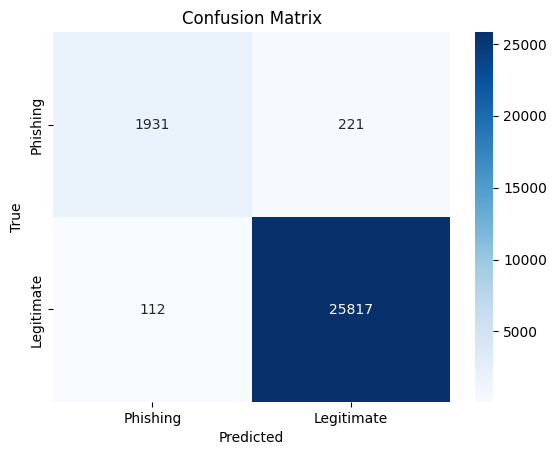

In [38]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.4f}')

# Classification report (precision, recall, f1-score)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## 5.1. KNN

## 5.2. Naive Bayes

## 5.3. Evaluation

# 6. Prediction

In [39]:
test_mv = FeaturesMissingHandler(test)

In [40]:
test_new = test_mv.df

In [41]:
test_new = test_new[col_to_use]

In [42]:
test_imputed = imputer.transform(test_new)

In [43]:
test_scaled = scaler.transform(test_imputed)

In [44]:
predict = knn.predict(test_scaled)

In [45]:
pred_csv = pd.DataFrame({
    'id': test_id,
    'label': predict
})

In [46]:
pred_csv.to_csv('pred.csv',index=False)

# 7. Analysis